#  Hidden Markov Model(HMM)


## 1. Measurement Model & Measurement Matrix

**Hidden Markov Model(HMM)**에 대한 이해를 위해 아래 예제를 코드로 구현해보자.

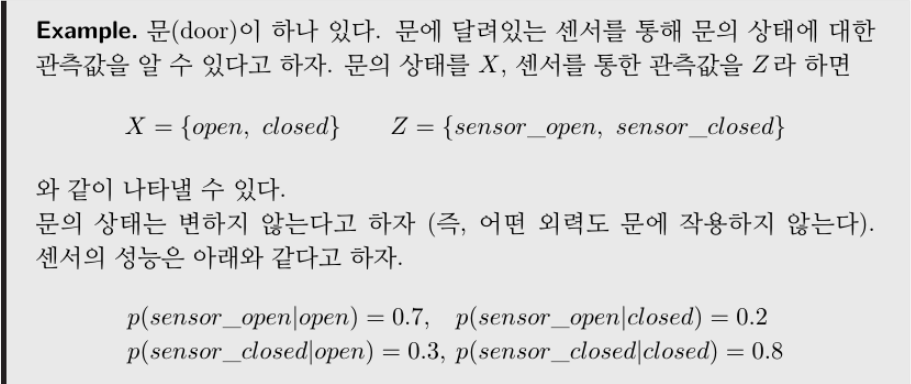

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [ ]:
# sensor_open은 SO / open은 O로 쓴다.
# sensor_closed은 SC / closed은 C로 쓴다.
# p(SO|O)는 p_SO_O 로 쓴다.
################## Fill Your Code! ##################
p_SO_O = 0.7
p_SC_O = 0.3
p_SO_C = 0.2
p_SC_C =0.8

# Initial probability
p_O = 0.5
p_C = 0.5
#####################################################

> (d) Bayes' Rule이 아래 그림처럼 주어졌을 때, 다음 확률들을 구하시오.  [4점]
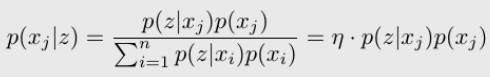



- p(opne|sensor_open)

- normalizer는 고려하지 않음

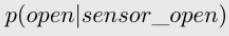

In [ ]:
################## Fill Your Code! ##################
# without eta
p_O_SO = p_SO_O * p_O
#####################################################

- p(closed|sensor_open)

- normalizer는 고려하지 않음

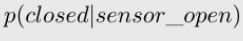

In [ ]:
################## Fill Your Code! ##################
# without eta
p_C_SO = p_SO_C*p_C
#####################################################

- normalizer 𝜂

In [ ]:
################## Fill Your Code! ##################
# compute eta
eta = 1/(p_O_SO + p_C_SO)
#####################################################

- result

In [ ]:
################## Fill Your Code! ##################
# normalize
p_O_SO = eta * p_O_SO
p_C_SO = eta * p_C_SO
#####################################################

print("p(open) = " + str(p_O))
print("p(open|sensor_open) = " + str(p_O_SO))
print("p(closed|sensor_open) = " + str(p_C_SO))

p(open) = 0.5
p(open|sensor_open) = 0.7777777777777778
p(closed|sensor_open) = 0.22222222222222224


> (g) Chapman-Kolmogorov Equation이 다음과 같이 주어졌을 때, 다음 확률들을 구하시오. [4점]

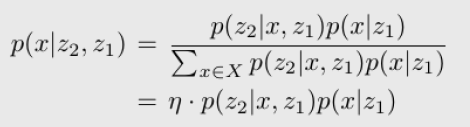

In [ ]:
# sensor_open은 SO / open은 O로 쓴다.
# sensor_closed은 SC / closed은 C로 쓴다.
# p(SO|O)는 p_SO_O 로 쓴다.
p_SO_O = 0.75
p_SC_O = 0.25
p_SO_C = 0.1
p_SC_C =0.9

# Initial probability
p_O = 1/3
p_C = 2/3

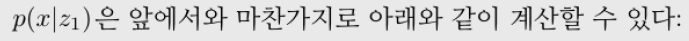

In [ ]:
################## Fill Your Code! ##################
# without eta1
p_O_SO = p_SO_O * p_O
p_C_SO = p_SO_C * p_C

# compute eta
eta1 =1/ (p_O_SO + p_C_SO)

# normalize
p_O_SO = eta1 * p_O_SO
p_C_SO = eta1 * p_C_SO
#####################################################

print("p(open) = " + str(p_O))
print("p(open|sensor_open) = " + str(p_O_SO))
print("p(closed|sensor_open) = " + str(p_C_SO))

p(open) = 0.3333333333333333
p(open|sensor_open) = 0.7894736842105263
p(closed|sensor_open) = 0.21052631578947367


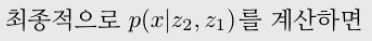

In [ ]:
################## Fill Your Code! ##################
# without eta2
p_O_SOSO = p_SO_O *  p_O_SO
p_C_SO_SO = p_SO_C * p_C_SO

# compute eta2
eta2 = 1/ (p_O_SOSO + p_C_SO_SO)

# normalize
p_O_SOSO = eta2 * p_O_SOSO
p_C_SO_SO = eta2 * p_C_SO_SO
#####################################################

print("p(open) = " + str(p_O))
print("p(open|sensor_open,sensor_open) = " + str(p_O_SOSO))
print("p(closed|sensor_open,sensor_open) = " + str(p_C_SO_SO))

p(open) = 0.3333333333333333
p(open|sensor_open,sensor_open) = 0.9656652360515022
p(closed|sensor_open,sensor_open) = 0.03433476394849786


## 2. Traversing the Number Line (State Transition Model with Control)


#### 이번 과제에서 최종적으로 구현할 bayes filter를 코딩하기 전, state transition probability를 코딩해보자.

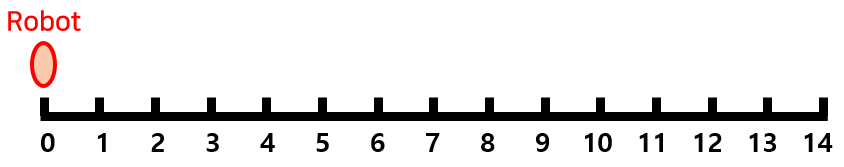

위 그림과 같이 0~14의 숫자가 쓰인 line을 움직이는 로봇이 있다.

로봇은 -2칸, 0칸, +2칸으로 움직일 수 있다. 이를 formal하게 표현하면 아래와 같이 쓸 수 있다.

- State $X=\{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14\}$
- Action $U = \{-2, 0, +2\}$
  - ex) $x_t=1$에서 $u_t=+2$만큼 움직이면 $x_{t+1}=3$에 도착.
  - ex) $x_t=3$에서 $u_t=0$만큼 움직이면 $x_{t+1}=3$에 도착.
  - ex) $x_t=1$에서 $u_t=-2$만큼 움직이면 $x_{t+1}=0$에 도착.(0~14만 존재)


- 먼저, 내 state $x$는 0~14의 값을 가질 수 있으므로, $bel(x)$의 차원은 $ℝ^{15}$가 된다.
- 내 초기 위치가 0인 것을 100% 알고 있을 때, $bel(x_0=0) = 1$이고, $bel(x_0 \neq 0) = 0$이 된다.

In [ ]:
################## Fill Your Code! ##################
bel = np.zeros((15))
bel[0] = 1
#####################################################

print(bel)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


- $u = +2$에 대하여, 내 state transition matrix $M_{u=+2}$의 차원은 $ℝ^{15 \times 15}$이다.

- 모든 $x$에서 $u=+2$ 일 때, 외력에 의해 $[+1,+2,+3]$ 칸을 갈 확률이 $[1/3,1/3,1/3]$이면, 내 $M_{u=+2}$는 그림과 같다.

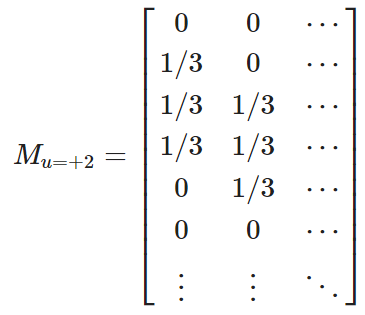

In [ ]:
################## Fill Your Code! ##################
# State Transition Matrix
M_plus2 = np.zeros((15,15))

for i in range(15):
  if i+1 < 15:
    M_plus2[i+1, i] = 1/3
  if i+2 < 15:
    M_plus2[i+2, i] = 1/3
  if i+3 < 15:
    M_plus2[i+3, i] = 1/3
#####################################################

for i in range(15):
  print(np.round(M_plus2[i], 1))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.3 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
[0.3 0.3 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
[0.3 0.3 0.3 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
[0.  0.3 0.3 0.3 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
[0.  0.  0.3 0.3 0.3 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
[0.  0.  0.  0.3 0.3 0.3 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
[0.  0.  0.  0.  0.3 0.3 0.3 0.  0.  0.  0.  0.  0.  0.  0. ]
[0.  0.  0.  0.  0.  0.3 0.3 0.3 0.  0.  0.  0.  0.  0.  0. ]
[0.  0.  0.  0.  0.  0.  0.3 0.3 0.3 0.  0.  0.  0.  0.  0. ]
[0.  0.  0.  0.  0.  0.  0.  0.3 0.3 0.3 0.  0.  0.  0.  0. ]
[0.  0.  0.  0.  0.  0.  0.  0.  0.3 0.3 0.3 0.  0.  0.  0. ]
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.3 0.3 0.3 0.  0.  0. ]
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.3 0.3 0.3 0.  0. ]
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.3 0.3 0.3 0. ]


> (e) 내 $bel(x_{t-1})$과 $bel(x_t)$ 사이의 관계는 state transition probability를 사용하여 표현하면 아래와 같다.

---
 $bel(x_t) =  \sum_{x_{t-1}}^{} p(x_t|x_{t-1}, u_t) bel(x_{t-1}) = M_{u_t}(x_t, x_{t-1})bel(x_{t-1})$

---
> 수식을 참고하여, 내 로봇이 $u=+2$를 반복 수행할 때의 $bel(x)$ 업데이트를 구해보자.
>

- 내 초기 위치에 대한 $bel(x)$와 $M_{u=+2}$는 (d)에서 정의한 것으로 사용한다.

In [ ]:
################## Fill Your Code! ##################
bel = M_plus2 @ bel
#####################################################
print(np.round(bel, 1))
print()

################## Fill Your Code! ##################
bel = M_plus2 @ bel
#####################################################
print(np.round(bel, 1))
print()

################## Fill Your Code! ##################
bel = M_plus2 @ bel
#####################################################
print(np.round(bel, 1))
print()

[0.  0.3 0.3 0.3 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]

[0.  0.  0.1 0.2 0.3 0.2 0.1 0.  0.  0.  0.  0.  0.  0.  0. ]

[0.  0.  0.  0.  0.1 0.2 0.3 0.2 0.1 0.  0.  0.  0.  0.  0. ]



- 총 5번 $u=+2$를 수행하면 아래와 같이 확률이 표현된다.

In [ ]:
# probabilistic forward projection
################## Fill Your Code! ##################
bel = np.zeros(15)
#####################################################
bel[0] = 1
bel_list = []   # 그림을 그리기 위해 필요한 변수입니다.
bel_list.append(bel)
k = 5
################## Fill Your Code! ##################
for i in range(k):
  bel = M_plus2 @ bel
  bel_list.append(bel)
#####################################################

# Cell for plot
def drawframe_p01(frame):
	frame = int(frame)
	x = np.arange(0, 15) + 1
	y = bel_list[frame]

	ax1.cla()
	ax1.set_xlim(1, 15)
	ax1.set_ylim(0, 1)
	ax1.bar(x, y)


fig1, ax1 = plt.subplots()
ax1.bar([], [])

ani1 = FuncAnimation(fig1, drawframe_p01, frames = np.arange(5), interval=300)
plt.close()

In [ ]:
HTML(ani1.to_html5_video())

## 3. Robot Kidnapping Problem
#### 위에서 공부한 HMM와 state transition probability를 통해 robot kidnapping problem을 구현해보자.

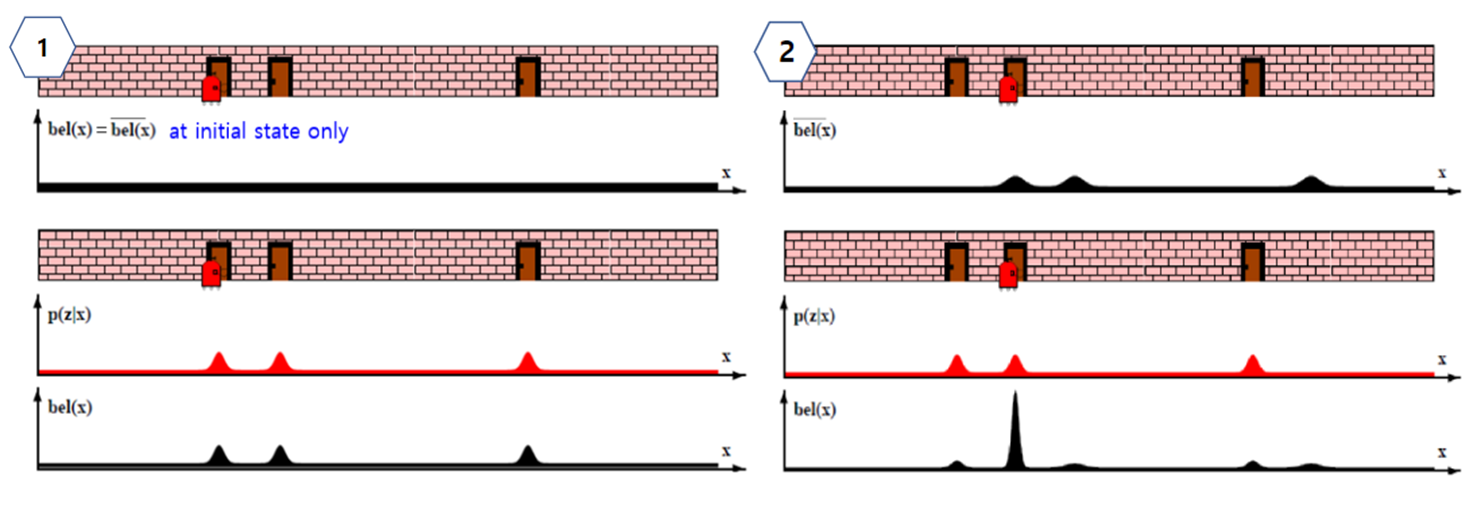

위 그림과 같이 0~199의 숫자가 쓰인 벽을 움직이는 로봇이 있다.

로봇은 -2칸, 0칸, +2칸으로 움직일 수 있다. 이를 formal하게 표현하면 아래와 같이 쓸 수 있다.

- State $X=\{0, ... , 199\}$
- Action $U = \{-2, 0, +2\}$

이번에는 로봇이 벽을 따라 움직이다, 자신의 위치에 대한 확률을 센서를 통해 알 수 있다고 하자.

- Observation $Z = \{0, ..., 199 \}$

-  그림 1에서 처음 자신의 위치는 uniform $bel(x)$를 가진다.
- 그림 1에서 로봇이 센서로 문을 찾으면, uniform이던 $bel(x)$가 센서 정보를 반영한 $p(z|x)$가 곱해지는 것을 볼 수 있다.
-  그림2에서 로봇이 다시 문을 센싱하면, $p(z|x)$를 곱하여, bel(x)가 치솟는 것을 볼 수 있다.
- 즉, 로봇이 벽을 지나며 문을 찾았을 때, 자신의 위치에 대한 확률이 높아지는 것을 볼 수 있다.
- 이는 문제 1. 에서 보았던 $p(open|sensor\_open, sensor\_open)$의 경우와 같음을 생각할 수 있다.

이를 알고리즘(bayes' filter)로 표현하면 아래 그림과 같다.

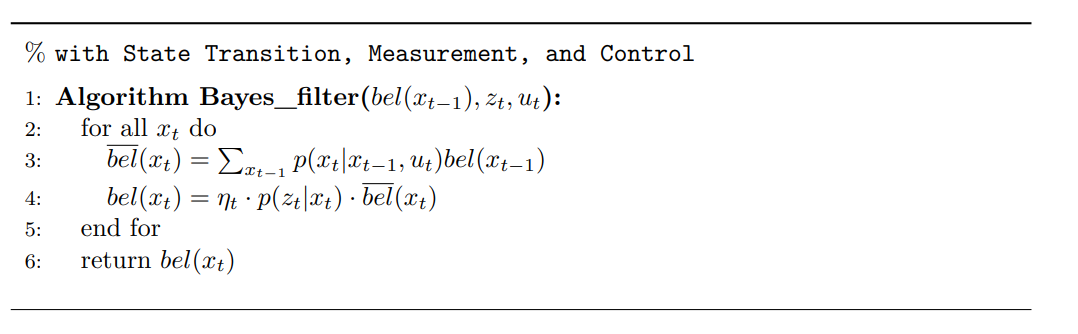

> (a) 문제 2에서 정의한 $p(x_t|x_{t-1},u_t)$는 사실 실제 로봇의 움직임으로 보기 어렵다.
>
> 이번 문제에서는, 로봇의 움직임이 가우시안 분포를 따른다 가정하여 문제를 풀어본다.
>
> - $bel(x)$의 차원은 $ℝ^{200}$과 같다.
> - $bel(x)$의 **initial belief**는 **uniform**이다.
> - $bel(x_t) = \sum_{x_{t-1}}{p(x_t|x_{t-1},u_t) bel(x_{t-1})}$는 $M_{u_t}bel$로 사용한다.
> - $p(x_{t+1}| x_t = 0, u_t = +2)$는 **mean**이 $+2$, **sigma**가 $1.5$인 가우시안 분포를 따른다.

In [ ]:
################## Fill Your Code! ##################
# Initialize belief
bel = np.ones(200)
bel = 1/200 * bel # normalize
#####################################################
# 일부만 show
print(bel[0:10])

[0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005]


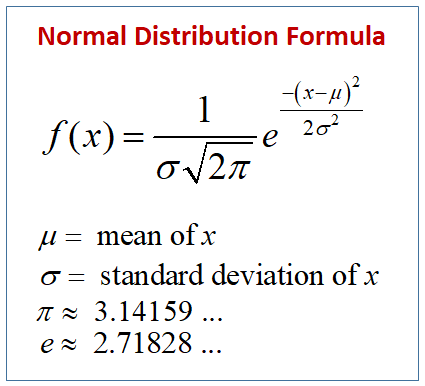

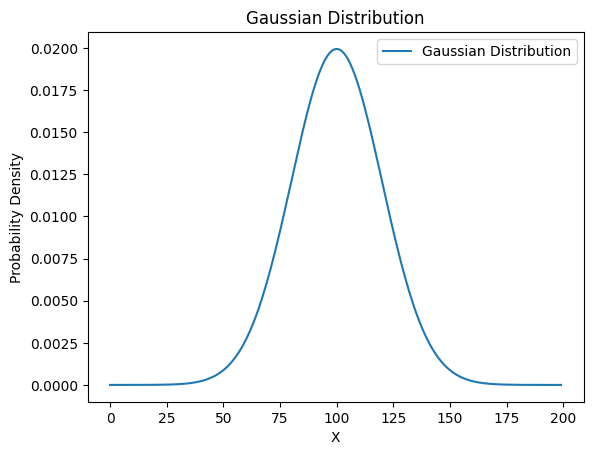

In [ ]:
# 가우시안 분포 예제
import numpy as np
import matplotlib.pyplot as plt
import random

# 가우시안 분포의 평균과 표준편차 설정
mean_value = 100
std_dev_value = 20

# 0부터 200까지의 값 생성
x = np.linspace(0, 199, 200)

################## Fill Your Code! ##################
# Define Gaussian Distribution
# Hint : np.pi, np.sqrt(), np.exp()
Gaussian_1D = lambda x, mean, std : 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * std**2))
#####################################################
gaussian_distribution = Gaussian_1D(x, mean_value, std_dev_value)

# 그래프 그리기
plt.plot(x, gaussian_distribution, label='Gaussian Distribution')
plt.title('Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

참조
- State $X=\{0, ... , 199\}$

In [ ]:
# U = +2 일 때, state transition probability matrix
def robot_1D(action = 2, std = 1.5):
   robot_model = np.zeros((200,200))  # |X| x |X| 크기의 정방행렬

   # 0부터 200까지의 값 생성
   x = np.linspace(0, 199, 200)

   # Define Gaussian Distribution
   ################## Fill Your Code! ##################
   # Hint : np.pi, np.sqrt(), np.exp()
   Gaussian_1D = lambda x, mean, std : 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * std**2))
   #####################################################

   for i in range(200):
    ################## Fill Your Code! ##################
    mean_value = i + action
    std_dev_value = std
    #####################################################
    gaussian_distribution = Gaussian_1D(x, mean_value, std_dev_value)
    robot_model[:,i] = gaussian_distribution/np.sum(gaussian_distribution)

   return robot_model

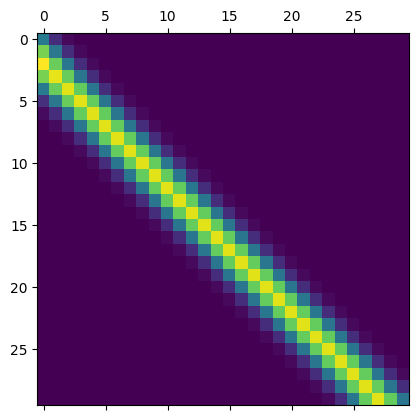

In [ ]:
# U = +2 일 때, state transition probability matrix를 M_plus2라 한다.
M_plus2 = robot_1D(action = 2, std = 1.5)

# 일부만 show
plt.matshow(M_plus2[0:30,0:30])
plt.show()

In [ ]:
print(np.round(M_plus2[0:10,0], 2))

[0.11 0.22 0.28 0.22 0.11 0.04 0.01 0.   0.   0.  ]


> (b) 이번에는 하나의 센서에 대한 센서 모델을 생각해보자.
> - 로봇은 센서로 문을 찾았을 때, 확률적으로 자신의 위치를 알 수 있다.
> - 이 때, 센서로 획득한 로봇의 위치는 가우시안 분포를 따른다고 가정한다.
> - 분포의 **mean**은 $0$, **sigma**가 $2.0$이다.

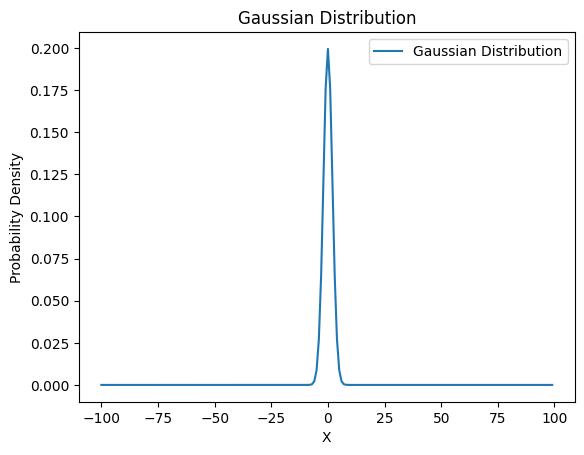

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 가우시안 분포의 평균과 표준편차 설정
mean_value = 0
std_dev_value = 2.0

# 0부터 200까지의 값 생성
x = np.linspace(-100, 99, 200)

################## Fill Your Code! ##################
# Define Gaussian Distribution
# Hint : np.pi, np.sqrt(), np.exp()
Gaussian_1D = lambda x, mean, std : 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * std**2))
#####################################################
gaussian_distribution = Gaussian_1D(x, mean_value, std_dev_value)

# 그래프 그리기
plt.plot(x, gaussian_distribution, label='Gaussian Distribution')
plt.title('Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [ ]:
print(np.round(gaussian_distribution[94:107], 2))

[0.   0.01 0.03 0.06 0.12 0.18 0.2  0.18 0.12 0.06 0.03 0.01 0.  ]


> (c) 위에서 구한 센서 모델을 사용하여 $p(z_t|x_t=sensor\_position)$를 구해보자.
> - $p(z_t | x_t)$의 차원은 $ℝ^{200\times200}$이다.
> - $p(z_t | x_t=0)$의 차원은 $ℝ^{200}$이다.
> - $p(z_t=0 | x_t=0)$의 차원은 $ℝ^{1}$이다.
>
> - 문을 인식할 수 있는 위치가 $30, 60, 90, 180$ 라고 하자.
> - 센서를 통해 문을 인식하면 몇번 째 문인지는 알 수 없으며, 그저 자신이 문을 지나왔다는 것만 알 수 있다.
> - 이 때, 센서로 획득한 로봇의 위치는 **mean**이 $0$, **sigma**가 $2.0$인 가우시안 분포를 따른다고 가정한다.

In [ ]:
def sensor_model(sensor_pos, mean = 0, std = 2.0):
  # -6부터 +6까지의 값 생성
  x = np.linspace(-6, 6, 13)

  # 가우시안 분포의 평균과 표준편차 설정
  mean_value = mean
  std_dev_value = std

  ################## Fill Your Code! ##################
  # Define Gaussian Distribution
  # Hint : np.pi, np.sqrt(), np.exp()
  Gaussian_1D = lambda x, mean, std : 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * std**2))
  #####################################################

  measurement_distribution = Gaussian_1D(x, mean_value, std_dev_value)  # Measurement Model.

  sensor_prob = np.zeros(200)                           # 1차원 직선의 길이. p(z_t|x_t=0)의 경우
  for sp in sensor_pos:
     lb = sp - int(len(measurement_distribution) / 2)
     ub = sp + int(len(measurement_distribution) / 2) + 1

     for i, m_idx in enumerate(range(lb, ub)):
      sensor_prob[m_idx] = sensor_prob[m_idx] + measurement_distribution[i]

  sensor_prob = sensor_prob/np.sum(sensor_prob) # Normalization
  return sensor_prob

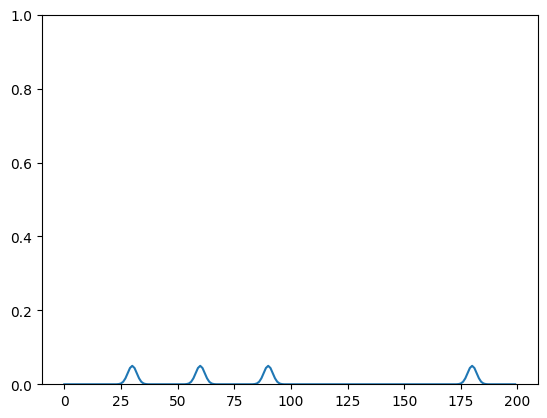

In [ ]:
# Sensors Position
sensor_pos = [30, 60, 90, 180]

sensor_model_at_sensor_position = sensor_model(sensor_pos, mean = 0, std = 2.0) # p(z|x=sensor_position)
plt.ylim(0, 1)
plt.plot(range(len(sensor_model_at_sensor_position)), sensor_model_at_sensor_position)

- (1) $p(z_t|x_t=sensor\_position)$는 위와 같이 분포를 볼 수 있었다.
- (2) $p(z_t|x_t\neq sensor\_position)$일 때는 uniform한 분포를 사용한다.
- **위 (1), (2)를 사용하여 전체 $p(z_t|x_t)$를 구하라.**

In [ ]:
def measure_1D(sensor_pos = [0], mean = 0, std = 2.0):
  measure_model_at_sensor_position = sensor_model(sensor_pos, mean = 0, std = 2.0)  # p(z|x=sensor_position)

  ################################## Fill Your Code! ##################################
  # p(z_t|x_t)의 크기를 고민해 보세요.
  measure_model = np.zeros((200,200))

  # 센서가 있는 분포는 p(z_t|x_t=sensor_position)
  # 센서가 없는 분포는 p(z_t|x_t!=sensor_position) 이 들어가야 합니다.
  for i in range(0,200):
    if i in sensor_pos:
      measure_model[i,:] = measure_model_at_sensor_position
    else :
      measure_model[i,:] = np.ones(200)
      measure_model[i,:] = 1/200 * measure_model[i,:] # normalize
  ######################################################################################

  return measure_model

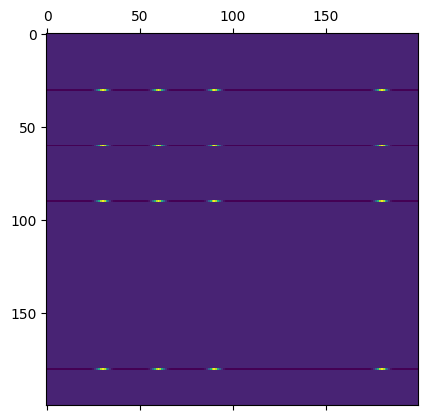

In [ ]:
# Sensors Position
sensor_pos = [30, 60, 90, 180]

# Measurment Model
measure_model = measure_1D(sensor_pos = sensor_pos, mean = 0, std = 2.0)
plt.matshow(measure_model)
plt.show()

- 내 초기 위치는 $x_0=0$입니다.
- 초기 $bel(x)$은 uniform distribution을 따릅니다.
- 내 action은 $u_t=+2$로 고정합니다.
- 센서의 위치는 [30, 60, 120] 입니다.
- 로봇의 state transition probability와 measurement model은 가우시안 분포를 따릅니다.
- State transition probability 분포의 **mean**은 $2$, **sigma**가 $1.5$입니다.
- Measurement model 분포의 **mean**은 $0$, **sigma**가 $2.0$입니다.

In [ ]:
# 이전 문제들을 참조하세요.
# U = +2 일 때, state transition probability matrix
def robot_1D(action = 2, std = 1.5):
   robot_model = np.zeros((200,200))  # 1차원 직선의 길이. 정방행렬. |X|^2 의 크기를 갖는다.

   # 0부터 200까지의 값 생성
   x = np.linspace(0, 199, 200)

   # Define Gaussian Distribution
   ################## Fill Your Code! ##################
   # Hint : np.pi, np.sqrt(), np.exp()
   Gaussian_1D = lambda x, mean, std : 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * std**2))
   #####################################################

   for i in range(200):
    ################## Fill Your Code! ##################
    mean_value = i + action
    std_dev_value = std
    #####################################################
    gaussian_distribution = Gaussian_1D(x, mean_value, std_dev_value)
    robot_model[:,i] = gaussian_distribution/np.sum(gaussian_distribution)

   return robot_model


def sensor_model(sensor_pos, mean = 0, std = 2.0):
  # -6부터 +6까지의 값 생성
  x = np.linspace(-6, 6, 13)

  # 가우시안 분포의 평균과 표준편차 설정
  mean_value = mean
  std_dev_value = std

  ################## Fill Your Code! ##################
  # Define Gaussian Distribution
  # Hint : np.pi, np.sqrt(), np.exp()
  Gaussian_1D = lambda x, mean, std : 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * std**2))
  #####################################################

  measurement_distribution = Gaussian_1D(x, mean_value, std_dev_value)  # Measurement Model.

  sensor_prob = np.zeros(200)                           # 1차원 직선의 길이. p(z_t|x_t=0)의 경우
  for sp in sensor_pos:
     lb = sp - int(len(measurement_distribution) / 2)
     ub = sp + int(len(measurement_distribution) / 2) + 1

     for i, m_idx in enumerate(range(lb, ub)):
      sensor_prob[m_idx] = sensor_prob[m_idx] + measurement_distribution[i]

  sensor_prob = sensor_prob/np.sum(sensor_prob) # Normalization
  return sensor_prob


def measure_1D(sensor_pos = [0], mean = 0, std = 2.0):
  measure_model_at_sensor_position = sensor_model(sensor_pos, mean = 0, std = 2.0)  # p(z|x=sensor_position)

  ################################## Fill Your Code! ##################################
  # p(z_t|x_t)의 크기를 고민해 보세요.
  measure_model = np.zeros((200,200))

  # 센서가 있는 분포는 p(z_t|x_t=sensor_position)
  # 센서가 없는 분포는 p(z_t|x_t!=sensor_position) 이 들어가야 합니다.
  for i in range(0,200):
    if i in sensor_pos:
      measure_model[i,:] = measure_model_at_sensor_position
    else :
      measure_model[i,:] = np.ones(200)
      measure_model[i,:] = 1/200 * measure_model[i,:] # normalize
  ######################################################################################

  return measure_model

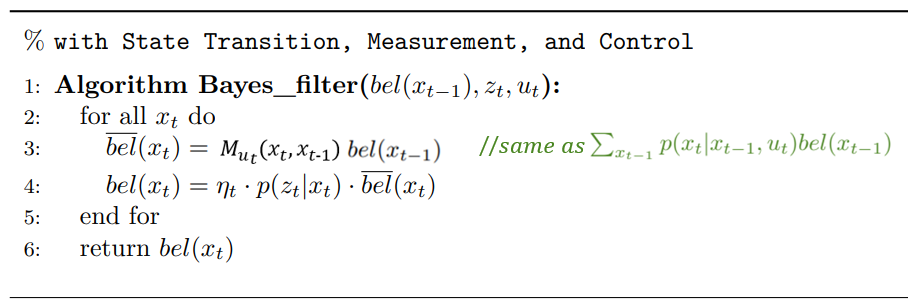

In [ ]:
################## Fill Your Code! ##################
# Algorithm Bayes' Filter에서 for문을 생략하여 표현합니다.
def Bayes_filter(bel, x, measure_model, M):
  bel = M @ bel           # State Transition @ bel
  bel = measure_model[x, :] * bel       # SesorModel * bel
  bel = bel / np.sum(bel)            # Normalize
  return bel
###############################################

In [ ]:
# Initial state x = 0 & Control input u = 2
x = 0
u = 2

################################## Fill Your Code! #########################################
# bel(x)
bel = np.ones(200)
bel = 1/200 * bel

# State transition matrix
M_plus2 = robot_1D()

# Sensors Position
sensor_pos = [30, 60, 90, 180]

# Measurment Model
measure_model = measure_1D(sensor_pos, mean=0, std=2.0) # p(z|x=sensor_position)
########################################################################################

x_list = np.zeros(200)
u_list = np.zeros(200)
bel_list = np.zeros((200, 200))

for i in range(0, 100):
  # Save x, action
  x_list[i] = x
  bel_list[i] = bel
  u_list[i] = u

  # Updata x
  x = x + u

  # Bayes' Filtering
  bel = Bayes_filter(bel, x, measure_model, M_plus2)

  # Check Terminating Condition
  if x == 198:
    break

In [ ]:
# Figure Initialization
fig1, ax1 = plt.subplots(nrows=2, ncols=1, constrained_layout=True)
ax1[0].plot([], [], [], [])
ax1[1].plot([], [])

# Define Drawing Function
def drawframe_p02(frame):
  frame = int(frame)
  ax1[0].cla()
  ax1[0].set_ylim([0, 1])

  # bel, x, u
  bel = bel_list[frame]
  x = np.round(x_list[frame], 3)
  u = u_list[frame]

  # plot bel, x, u
  ax1[0].plot(range(200), bel_list[frame], label = "bel(x)")
  ax1[0].plot(x_list[frame], 0.05, 'r*', label = "x")
  ax1[0].set_title('bel(x) and x')
  ax1[0].set_xlabel('curr pos: '+ str(x) + '  //  curr act:' + str(u));
  ax1[0].legend()

  # plot measure_model
  ax1[1].cla()
  ax1[1].plot(range(200), measure_model[sensor_pos[1]])
  ax1[1].set_xlim([-3, 200])
  ax1[1].set_ylim([0, 1])
  ax1[1].set_title('p(z|x = sensor_position)')

# Draw Animation
ani1 = FuncAnimation(fig1, drawframe_p02, frames=np.linspace(0,99,99), interval=300)
plt.close()

In [ ]:
# Show Animation
HTML(ani1.to_html5_video())

<결과 비교>